# Gradient Descent Algorithm
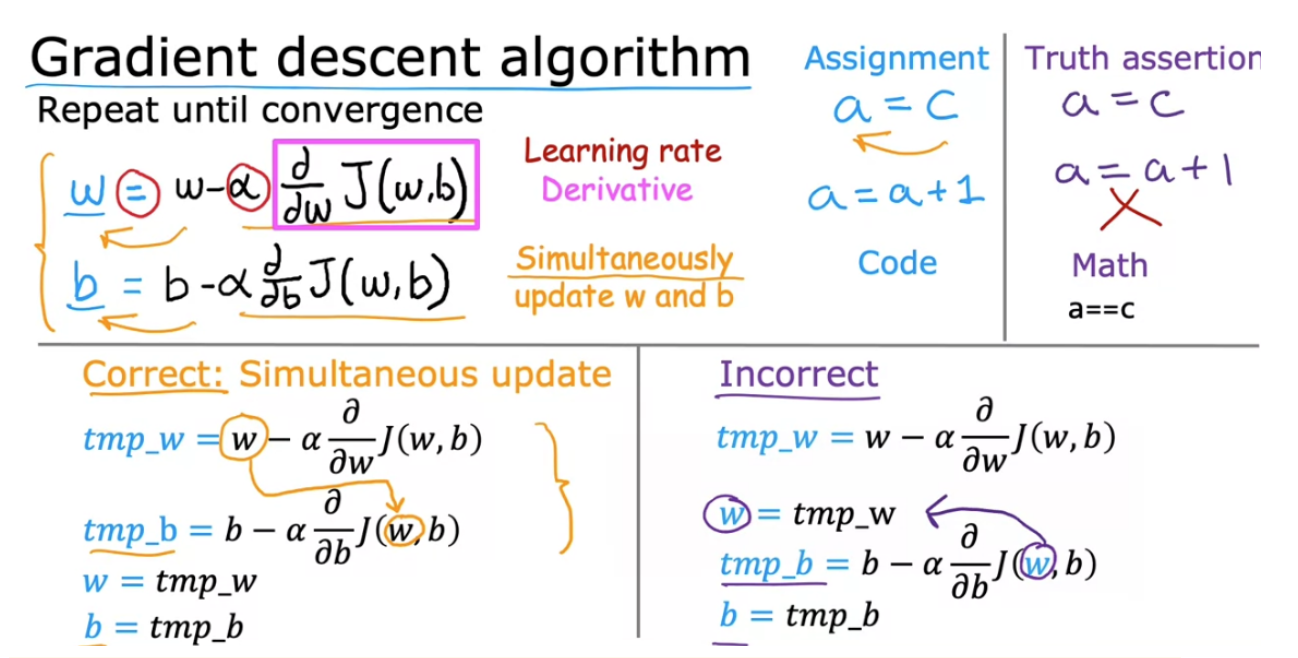

## Implementation

In [2]:
# Calculating derivatives with central difference method

def w_der(cost_func, w, b, m, f, x, y, n=0.001):
    h = n/2.0
    return (cost_func(w=w+h, b=b, m=m, f=f, x=x, y=y) - cost_func(w=w-h, b=b, m=m, f=f, x=x, y=y))/n

def b_der(cost_func, w, b, m, f, x, y, n=0.001):
    h = n/2.0
    return (cost_func(w, b+h, m, f, x, y) - cost_func(w, b-h, m, f, x, y))/n


# define linear regression model
def f(w, b, x):
    return w*x + b


# Define cost function
def sqr_cost_func(w, b, m, f, x, y):
    # w, b - parameters
    # f - model function
    # x - training x values
    # y - training y values
    sum = 0
    for i in range(0, m):
        sum += (f(w, b, x[i]) - y[i])**2
    return sum/(2*m)

# the square cost function is effective here because gradient decent
# can find the local min, but not necessarily the global min
# SCF only has 1 minimun, which is the global min

def gradient_decent(f, x, y, w0, b0, a = 0.01, t = 2e-6, n=1e6):
    # x, y - training data
    # f - model function
    # w0, b0 - init parameters
    # a - step size
    # t - threshold, n - max iterations
    w = w0
    b = b0
    m = len(x)
    i=0

    # repeat until convergence or pass max iterations
    while (i < n):
        
        temp_w = w - a*w_der(sqr_cost_func, w, b, m, f, x, y)
        temp_b = b - a*b_der(sqr_cost_func, w, b, m, f, x, y)

        if (temp_w - w < t) and (temp_b - b < t):
            w = temp_w
            b = temp_b
            break
        else:
            w = temp_w
            b = temp_b

        i+=1
    
    return w, b

## Alternate Implementation
Combine cost function and derivative functions
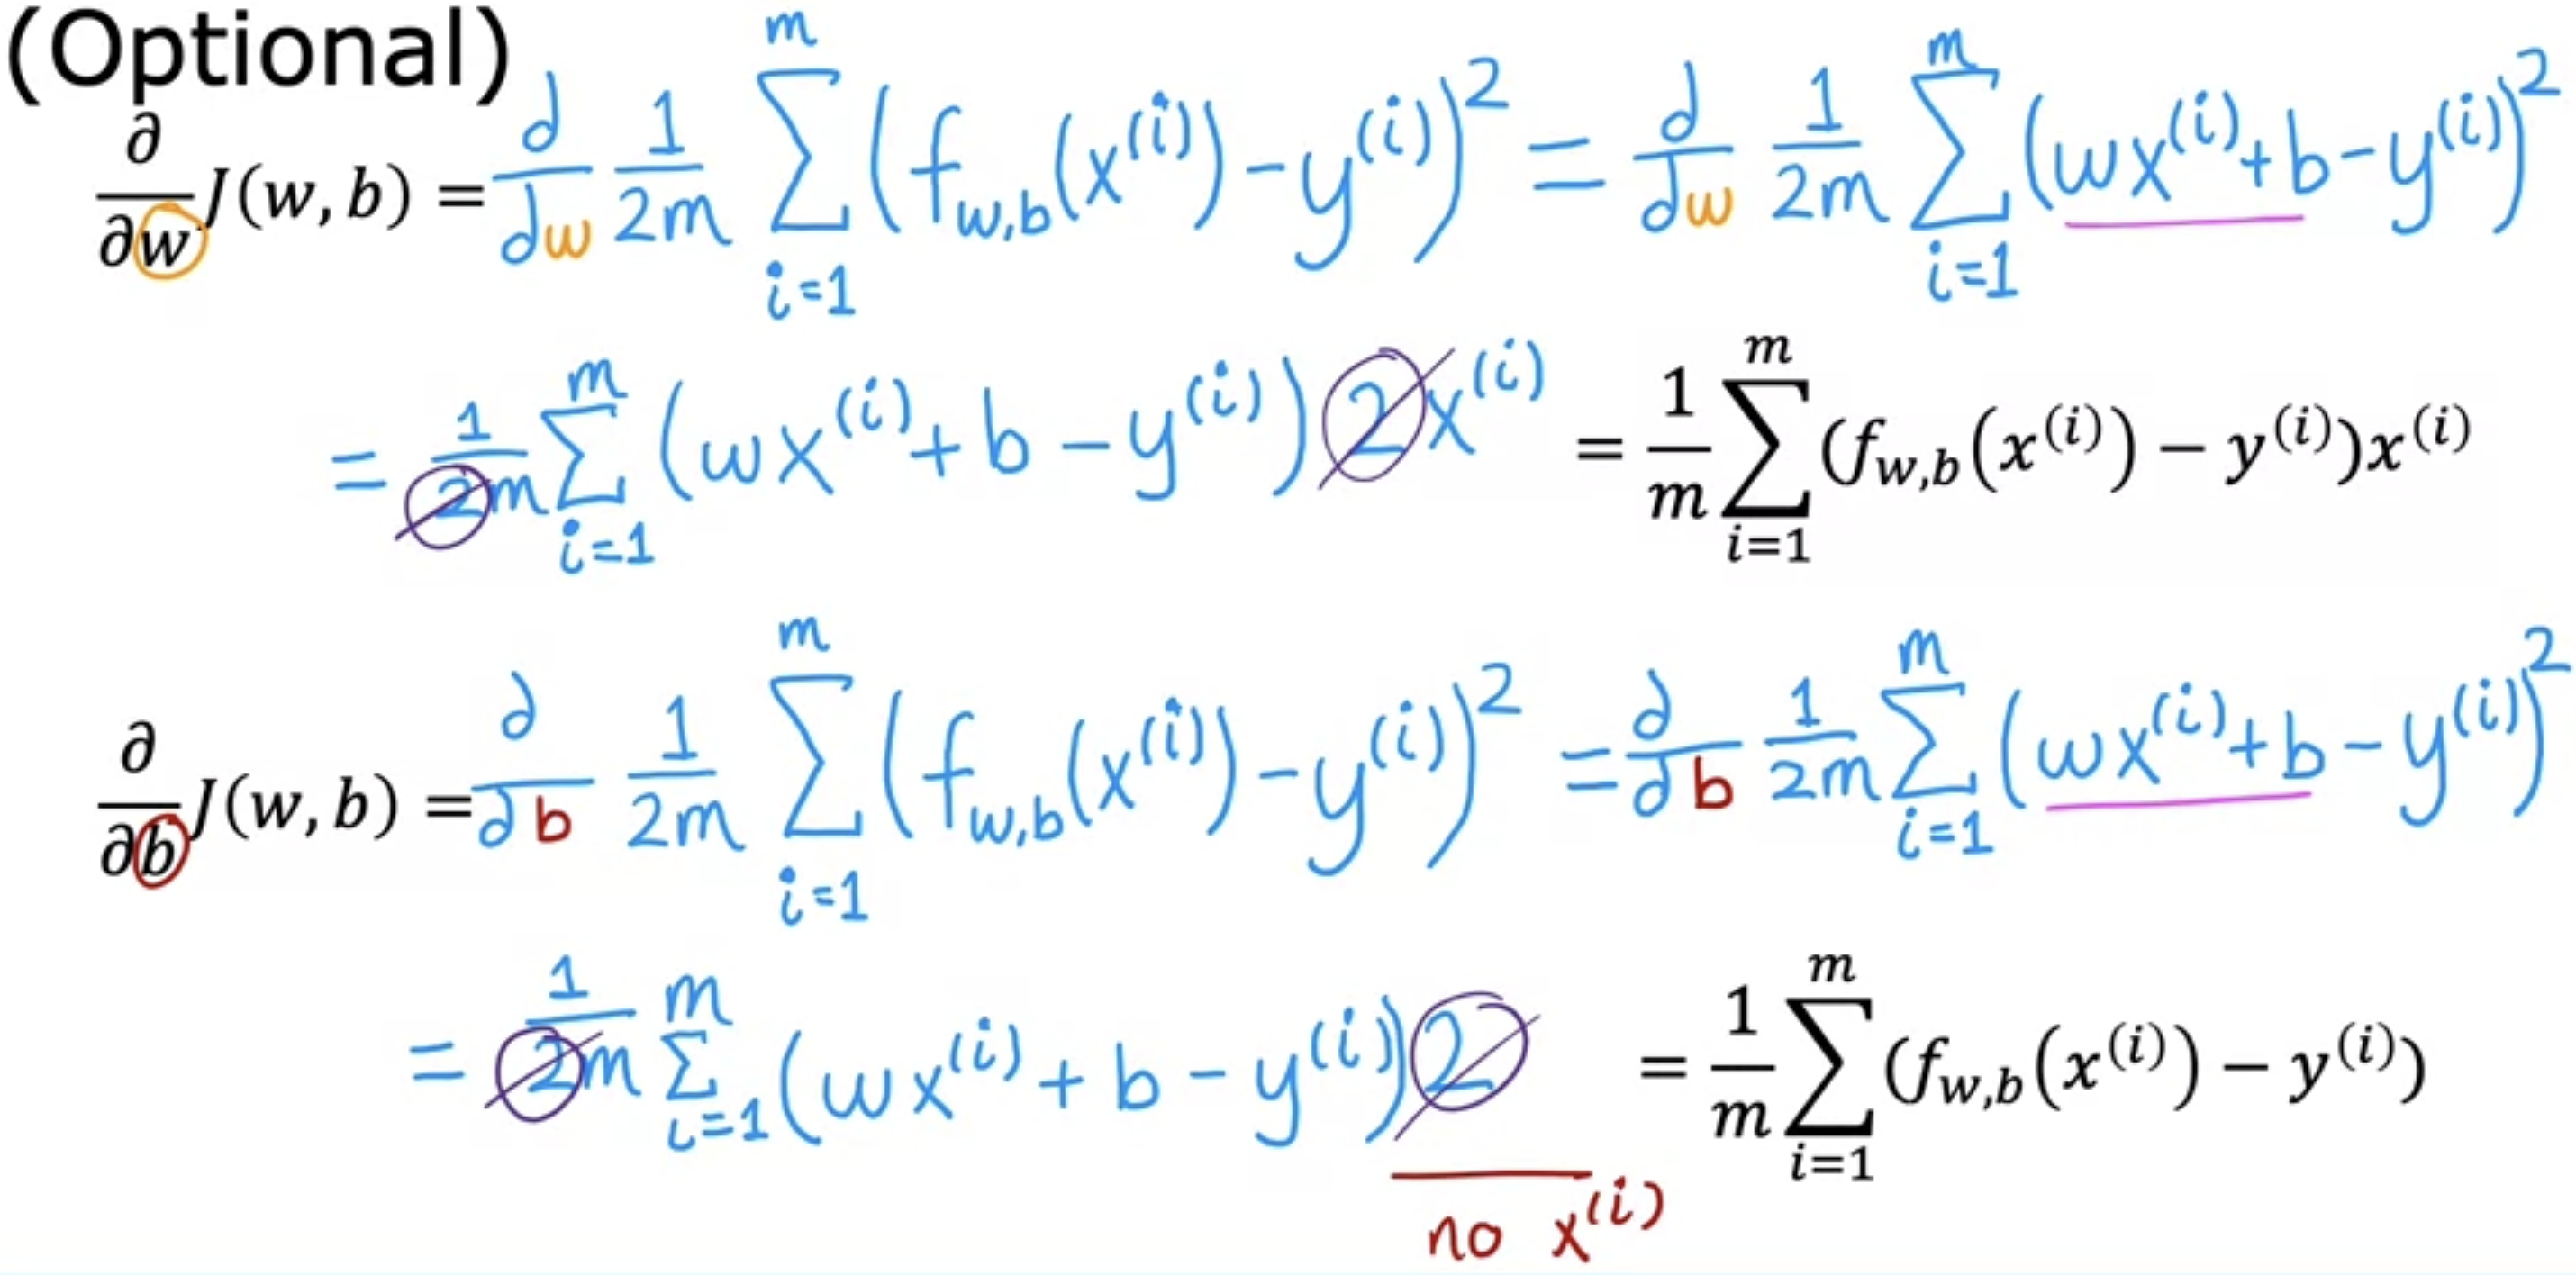

In [3]:
# define linear regression model
def f(w, b, x):
    return w*x + b

# partial derivate wrt w
def w_der(f, x, y, w, b):
    m = len(x)
    sum = 0
    for i in range(0, m):
        sum += (f(w, b, x=x[i]) - y[i]) * x[i]
    return sum/m

# partial derivate wrt b
def b_der(f, x, y, w, b):
    m = len(x)
    sum = 0
    for i in range(0, m):
        sum += (f(w, b, x[i]) - y[i])
    return sum/m

def gradient_decent(f, x, y, w0, b0, a = 0.01, t = 2e-6, n=1e6):
    # x, y - training data
    # f - model function
    # w0, b0 - init parameters
    # a - step size/ learning rate
    # t - threshold, n - max iterations

    w = w0
    b = b0
    i = 0
    while i < n:
        temp_w = w - a*w_der(f, x, y, w, b)
        temp_b = b - a*b_der(f, x, y, w, b)

        # check for convergence
        if (temp_w - w < t) and (temp_b - b < t):
            w = temp_w
            b = temp_b
            break
        else:
            w = temp_w
            b = temp_b

        i+=1
    
    return w, b
        


## Choosing a good value for learning rate $\alpha$ (variable a)
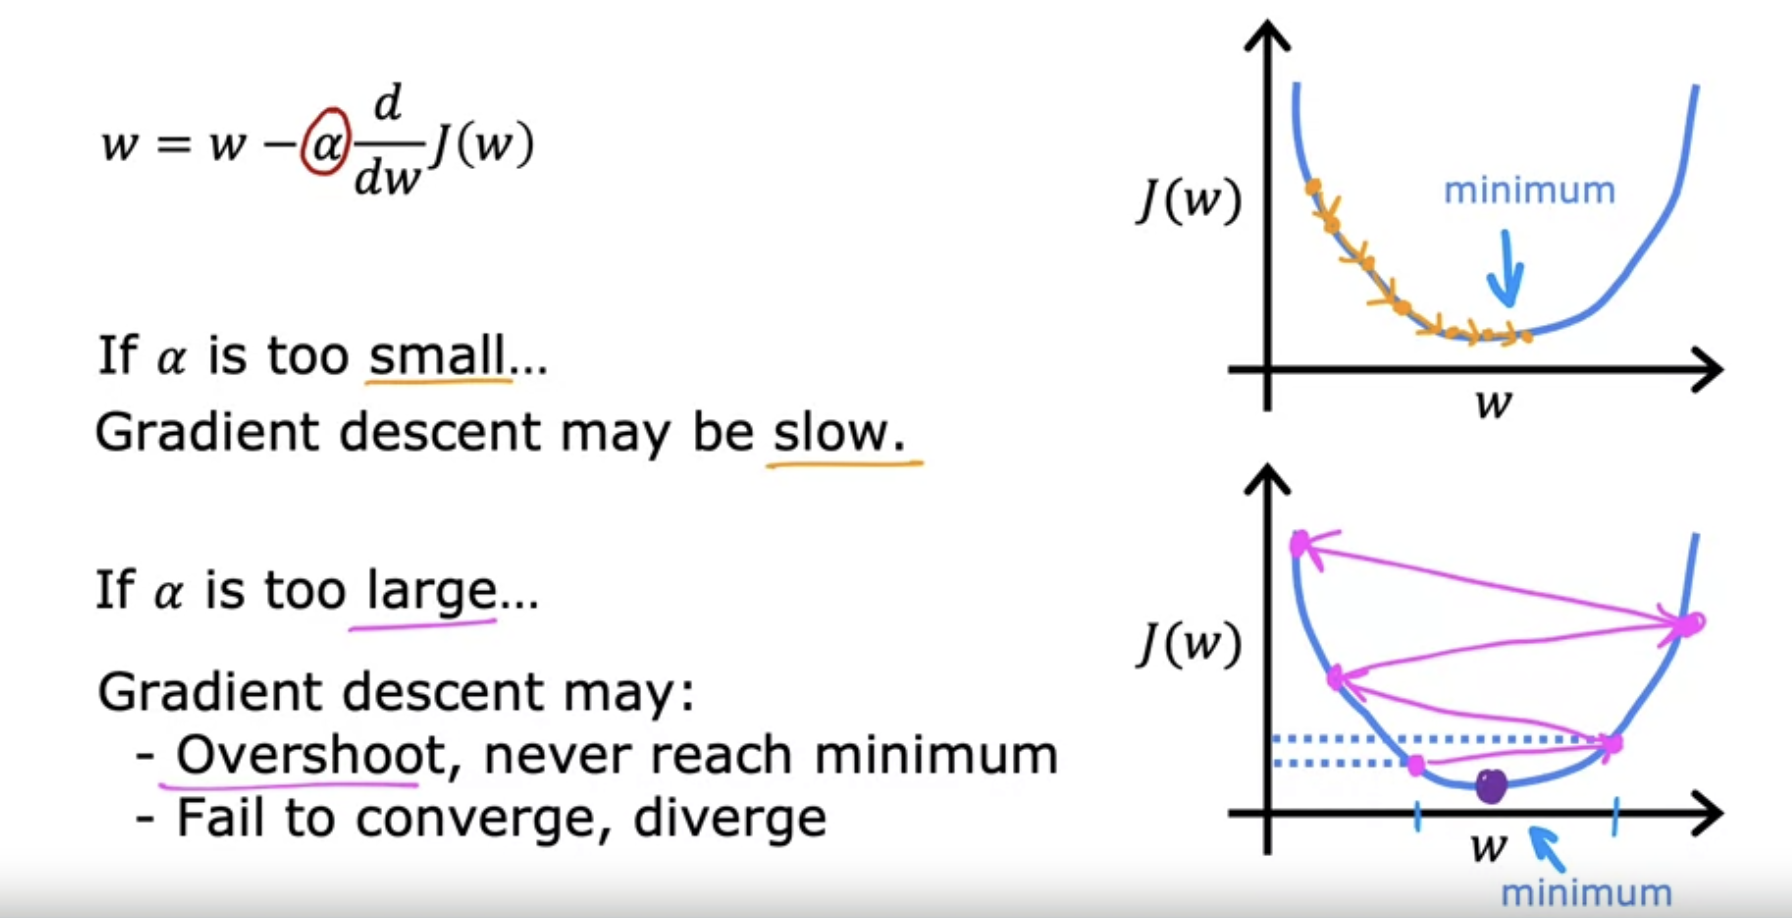

At local minimun, the partial derivative equals 0, value converges

In [4]:
# Testing the algorithm

# Training date (i made up)
x = [0, 4, 8, 12]
y = [5, 6, 7, 8]

# Initial parameters (guess)
w0 = 0.5
b0 = 1


w, b = gradient_decent(f, x, y, w0, b0)
print(f"w ={w}, b = {b}")

w =0.250060718740089, b = 4.999436864693823
